In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

### Importing the dataset from CSV file. 

In [2]:
df = pd.read_csv('insurance.csv')
print(df.shape)
print(df.head(10))

(1338, 7)
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
5   31  female  25.740         0     no  southeast   3756.62160
6   46  female  33.440         1     no  southeast   8240.58960
7   37  female  27.740         3     no  northwest   7281.50560
8   37    male  29.830         2     no  northeast   6406.41070
9   60  female  25.840         0     no  northwest  28923.13692


* Function to seperate the categorical and quantitative variables. 

In [3]:
def check_variables(df):
    cols = df.columns
    quantitative_cols = df._get_numeric_data().columns
    categorical_cols = list(set(cols) - set(quantitative_cols))
    return categorical_cols, list(set(quantitative_cols))

In [4]:
cat_cols, quant_cols = check_variables(df)
print(f'categorical columns: {cat_cols}')
print(f'quantitativecolumns: {quant_cols}') 

categorical columns: ['smoker', 'sex', 'region']
quantitativecolumns: ['age', 'bmi', 'children', 'charges']


<table>
  <tr>
    <th>Categorical Variables</th>
    <th>Quantitative Variables</th>
  </tr>
  <tr>
    <td>sex</td>
    <td>charges</td>
  </tr>
  <tr>
    <td>region</td>
    <td>children</td>
  </tr>
  <tr>
    <td>smoker</td>
    <td>age</td>
  </tr>
  <tr>
    <td>--</td>
    <td>bmi</td>
  </tr>
</table>

### Categorical Explanatory to Quantitative Response (C->Q)

##### Case 1-1- Is there any relation between gender of a person and the amount of insurance charges he/she pay?

<AxesSubplot:xlabel='sex', ylabel='charges'>

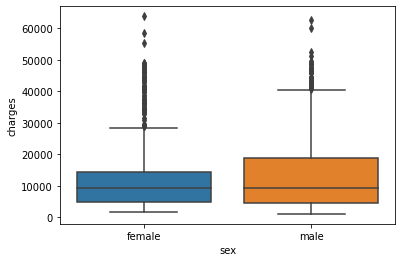

In [5]:
sns.boxplot(x='sex', y='charges', data=df, order=['female', 'male'])

In [6]:
df2 = df[['charges', 'sex']].groupby('sex').describe()
df2.transpose()

sex                  female          male
charges count    662.000000    676.000000
        mean   12569.578844  13956.751178
        std    11128.703801  12971.025915
        min     1607.510100   1121.873900
        25%     4885.158700   4619.134000
        50%     9412.962500   9369.615750
        75%    14454.691825  18989.590250
        max    63770.428010  62592.873090

##### Case 1-2- Is there any relation between gender of a person and the number of his/her children?

<AxesSubplot:xlabel='sex', ylabel='children'>

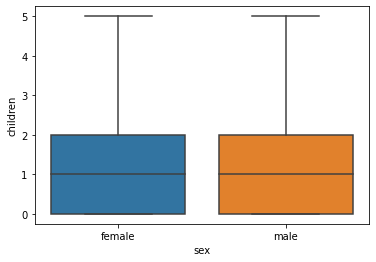

In [7]:
sns.boxplot(x='sex', y='children', data=df)

In [8]:
df[['children', 'sex']].groupby('sex').describe().transpose()

sex                 female        male
children count  662.000000  676.000000
         mean     1.074018    1.115385
         std      1.192115    1.218986
         min      0.000000    0.000000
         25%      0.000000    0.000000
         50%      1.000000    1.000000
         75%      2.000000    2.000000
         max      5.000000    5.000000

* We can see there is almost no difference in children number distribution between male and female people.

##### Case 1-3- Is there any relation between gender of a person and the body mass index (bmi)?

<AxesSubplot:xlabel='sex', ylabel='bmi'>

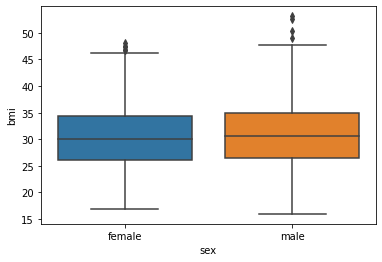

In [9]:
sns.boxplot(x='sex', y='bmi', data=df)

In [10]:
df[['bmi', 'sex']].groupby('sex').describe().transpose()[1:]

sex          female       male
bmi mean  30.377749  30.943129
    std    6.046023   6.140435
    min   16.815000  15.960000
    25%   26.125000  26.410000
    50%   30.107500  30.687500
    75%   34.313750  34.992500
    max   48.070000  53.130000

* The only considerable issue in comparing bmi for male and female, is the maximum ammount of it whaich is grater for men. Otherwise there is no relation between these two variables. 

##### Case 1-4- Is there any relation between gender of a person and their age?

<AxesSubplot:xlabel='sex', ylabel='age'>

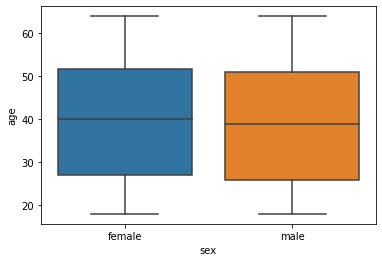

In [11]:
sns.boxplot(x='sex', y='age', data=df)

In [12]:
df[['age', 'sex']].groupby('sex').describe().transpose()[1:]

sex          female       male
age mean  39.503021  38.917160
    std   14.054223  14.050141
    min   18.000000  18.000000
    25%   27.000000  26.000000
    50%   40.000000  39.000000
    75%   51.750000  51.000000
    max   64.000000  64.000000

* Here, in age variable also there is no difference between male and female. 

##### Case 2-1- Is there any relation between region of a person and the amount of insurance charges he/she pay?

<AxesSubplot:xlabel='region', ylabel='charges'>

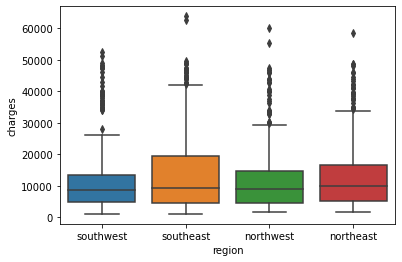

In [13]:
sns.boxplot(x='region', y='charges', data=df)

In [14]:
df[['charges', 'region']].groupby('region').describe().transpose()

region            northeast     northwest     southeast     southwest
charges count    324.000000    325.000000    364.000000    325.000000
        mean   13406.384516  12417.575374  14735.411438  12346.937377
        std    11255.803066  11072.276928  13971.098589  11557.179101
        min     1694.796400   1621.340200   1121.873900   1241.565000
        25%     5194.322288   4719.736550   4440.886200   4751.070000
        50%    10057.652025   8965.795750   9294.131950   8798.593000
        75%    16687.364100  14711.743800  19526.286900  13462.520000
        max    58571.074480  60021.398970  63770.428010  52590.829390

* The people in 'Southeast' region have more diversity payment in charges. 
* On the other hand 'Southwest' region has lower diverse charge payements. 

##### Case 2-2- Is there any relation between region of a person and their age?

<AxesSubplot:xlabel='region', ylabel='age'>

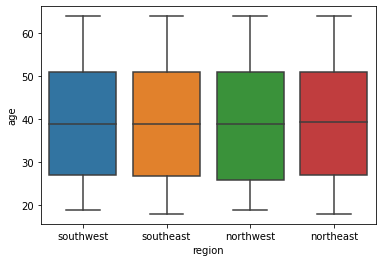

In [15]:
sns.boxplot(x='region', y='age', data=df)

In [16]:
df[['age', 'region']].groupby('region').describe().transpose()

region      northeast   northwest   southeast   southwest
age count  324.000000  325.000000  364.000000  325.000000
    mean    39.268519   39.196923   38.939560   39.455385
    std     14.069007   14.051646   14.164585   13.959886
    min     18.000000   19.000000   18.000000   19.000000
    25%     27.000000   26.000000   26.750000   27.000000
    50%     39.500000   39.000000   39.000000   39.000000
    75%     51.000000   51.000000   51.000000   51.000000
    max     64.000000   64.000000   64.000000   64.000000

* This shows that all the regions have the same distribution for age variable with all the items to be equal. 

##### Case 2-3- Is there any relation between the region of a person and his/her bmi?

<AxesSubplot:xlabel='region', ylabel='bmi'>

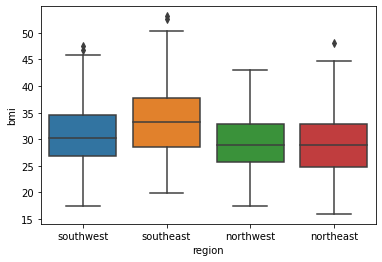

In [17]:
sns.boxplot(x='region', y='bmi', data=df)

In [18]:
df[['bmi', 'region']].groupby('region').describe().transpose()


region      northeast   northwest   southeast   southwest
bmi count  324.000000  325.000000  364.000000  325.000000
    mean    29.173503   29.199785   33.355989   30.596615
    std      5.937513    5.136765    6.477648    5.691836
    min     15.960000   17.385000   19.800000   17.400000
    25%     24.866250   25.745000   28.572500   26.900000
    50%     28.880000   28.880000   33.330000   30.300000
    75%     32.893750   32.775000   37.812500   34.600000
    max     48.070000   42.940000   53.130000   47.600000

* 'Southeast' region has considerable difference from other regions. It is clear that its median is greater than the western regions' third quantile. 
* Also it has the greatest amount of bmi in all, on the other hand northwest hast the least maximum value. 

##### Case 2-4- Is there any relation between the region of a person and his/her children?

<AxesSubplot:xlabel='region', ylabel='children'>

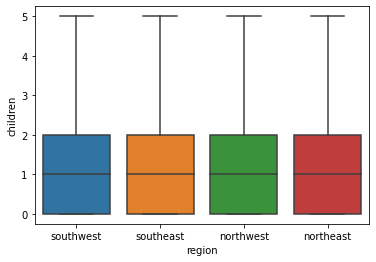

In [19]:
sns.boxplot(x='region', y='children', data=df)

In [20]:
df[['children', 'region']].groupby('region').describe().transpose()

region           northeast   northwest   southeast   southwest
children count  324.000000  325.000000  364.000000  325.000000
         mean     1.046296    1.147692    1.049451    1.141538
         std      1.198949    1.171828    1.177276    1.275952
         min      0.000000    0.000000    0.000000    0.000000
         25%      0.000000    0.000000    0.000000    0.000000
         50%      1.000000    1.000000    1.000000    1.000000
         75%      2.000000    2.000000    2.000000    2.000000
         max      5.000000    5.000000    5.000000    5.000000

* Children 'distribution' versus 'region' is the same as in that with 'sex'

##### Case 3-1- Is there any relation between the person being a smoker and the his/her bmi?

<AxesSubplot:xlabel='smoker', ylabel='bmi'>

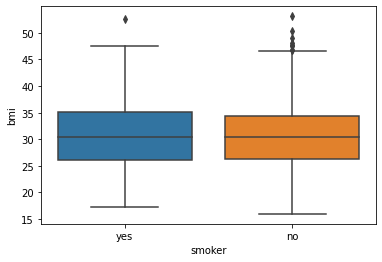

In [21]:
sns.boxplot(x='smoker', y='bmi', data=df)

In [22]:
df[['bmi', 'smoker']].groupby('smoker').describe().transpose()

smoker              no         yes
bmi count  1064.000000  274.000000
    mean     30.651795   30.708449
    std       6.043111    6.318644
    min      15.960000   17.195000
    25%      26.315000   26.083750
    50%      30.352500   30.447500
    75%      34.430000   35.200000
    max      53.130000   52.580000

* Just for notice, there is a huge difference between male and female smoker, and it is not bounded with any other variable. 
* However, the distributions of two categories are the same for smoking status. 

##### Case 3-2- Is there any relation between the person being a smoker and the his/her age?

<AxesSubplot:xlabel='smoker', ylabel='age'>

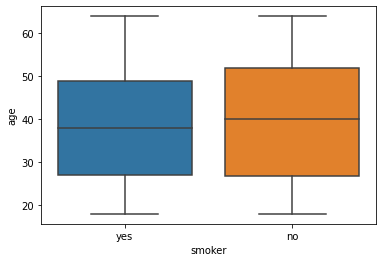

In [23]:
sns.boxplot(x='smoker', y='age', data= df)

In [24]:
df[['age', 'smoker']].groupby('smoker').describe().transpose()

smoker              no         yes
age count  1064.000000  274.000000
    mean     39.385338   38.514599
    std      14.083410   13.923186
    min      18.000000   18.000000
    25%      26.750000   27.000000
    50%      40.000000   38.000000
    75%      52.000000   49.000000
    max      64.000000   64.000000

* Almost everything is the same, except for third quartile and median, in which the non-smokers are having higher age. 

##### Case 3-3- Is there any relation between the person being a smoker and the his/her children?

<AxesSubplot:xlabel='smoker', ylabel='children'>

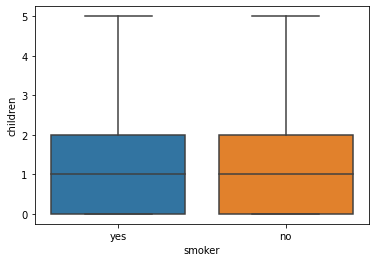

In [25]:
sns.boxplot(x='smoker', y='children', data=df)

In [26]:
df[['children', 'smoker']].groupby('smoker').describe().transpose()

smoker                   no         yes
children count  1064.000000  274.000000
         mean      1.090226    1.113139
         std       1.218136    1.157066
         min       0.000000    0.000000
         25%       0.000000    0.000000
         50%       1.000000    1.000000
         75%       2.000000    2.000000
         max       5.000000    5.000000

* Children is distributed the same between smokers and non-smokers; same as 'sex' and 'region'. 

##### Case 3-4- Is there any relation between the person being a smoker and the his/her charges?

<AxesSubplot:xlabel='smoker', ylabel='charges'>

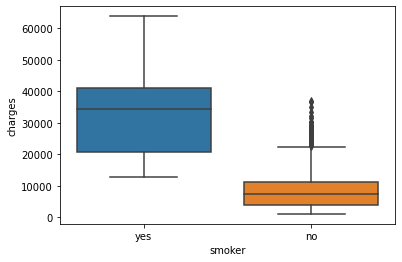

In [27]:
sns.boxplot(x='smoker', y='charges', data=df)

In [28]:
df[['charges', 'smoker']].groupby('smoker').describe().T

smoker                   no           yes
charges count   1064.000000    274.000000
        mean    8434.268298  32050.231832
        std     5993.781819  11541.547176
        min     1121.873900  12829.455100
        25%     3986.438700  20826.244213
        50%     7345.405300  34456.348450
        75%    11362.887050  41019.207275
        max    36910.608030  63770.428010

* Finally some difference!!
* The amount of charges for smokers has a substantial difference from that of non-smokers. 

### Categorical Explanatory to Categorical Response (C->C)

sex - smoker - region

Case I- Is there any relation between a person's gender and her/his smoking status? 

In [29]:
df2 = df.pivot_table(index='sex', columns='smoker', values='region', aggfunc='count')

In [30]:
df2

smoker,no,yes
sex,,
female,547,115
male,517,159


In [31]:
female_counter = df2[0:1]
male_counter = df2[1:2]

female_percentage = female_counter.values/df2.sum(axis=1)[0]
male_percentage = male_counter.values/df2.sum(axis=1)[1]

In [32]:
female_percentage = female_percentage[0] * 100
male_percentage = male_percentage[0] * 100

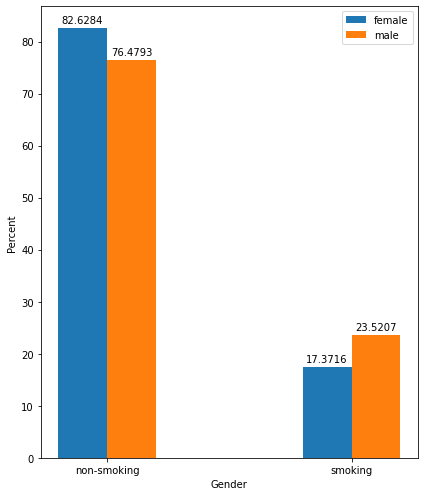

In [33]:
labels = ['non-smoking', 'smoking']
x = np.arange(len(labels))
width = 0.2 
fig, ax = plt.subplots(figsize=(6,7))
rects1 = ax.bar(x-width/2, female_percentage, width, label='female')
rects2 = ax.bar(x+width/2, male_percentage, width, label='male')
ax.set_ylabel('Percent')
ax.set_xlabel('Gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
fig.tight_layout()

* We can observ that non-smoking females outnumber non-smokking males. This fact is reversed for smoking group. 

Case II- Is there any relation between a person's gender and her/his region of residence? 

In [34]:
df2 = df.pivot_table(index='sex', columns='region', values='smoker', aggfunc='count')
df2

region,northeast,northwest,southeast,southwest
sex,,,,
female,161,164,175,162
male,163,161,189,163


In [35]:
female_counter = df2[0:1]
male_counter = df2[1:2]

female_percentage = female_counter.values/df2.sum(axis=1)[0]
male_percentage = male_counter.values/df2.sum(axis=1)[1]

In [36]:
female_percentage = female_percentage[0] * 100
male_percentage = male_percentage[0] * 100

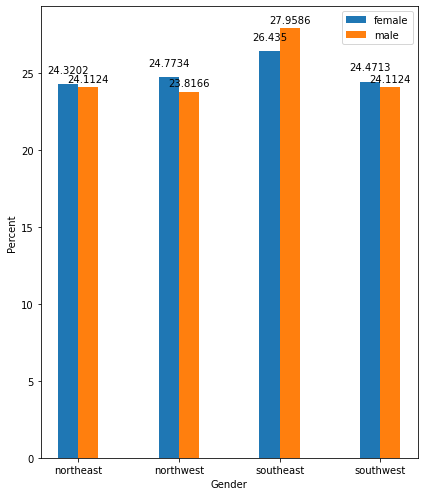

In [37]:
labels = ['northeast', 'northwest', 'southeast', 'southwest']
x = np.arange(len(labels))
width = 0.2 
fig, ax = plt.subplots(figsize=(6,7))
rects1 = ax.bar(x-width/2, female_percentage, width, label='female')
rects2 = ax.bar(x+width/2, male_percentage, width, label='male')
ax.set_ylabel('Percent')
ax.set_xlabel('Gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
ax.bar_label(rects1, padding=9)
ax.bar_label(rects2, padding=3)
fig.tight_layout()

* The most populated region (southeast) has for male rather than female, whereas the rest of the regions with lower population, has higher number of female. 

Case III- Is there any relation between a person's smoking status and her/his region of residence? 

In [38]:
df2 = df.pivot_table(index='smoker', columns='region', values='sex', aggfunc='count')
df2

region,northeast,northwest,southeast,southwest
smoker,,,,
no,257,267,273,267
yes,67,58,91,58


In [39]:
non_smoker_counter = df2[0:1]
smoker_counter = df2[1:2]

non_smoker_percentage = non_smoker_counter.values/df2.sum(axis=1)[0]
smoker_percentage = smoker_counter.values/df2.sum(axis=1)[1]

In [40]:
non_smoker_percentage = non_smoker_percentage[0] * 100
smoker_percentage = smoker_percentage[0] * 100

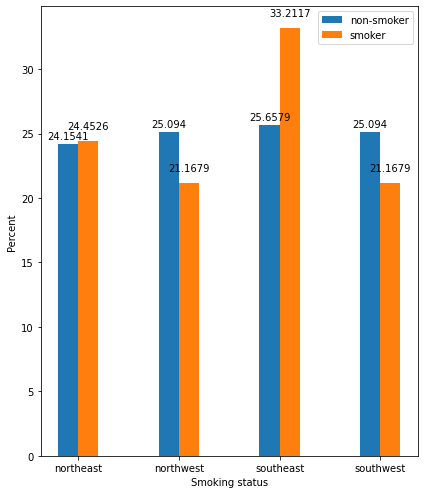

In [41]:
labels = ['northeast', 'northwest', 'southeast', 'southwest']
x = np.arange(len(labels))
width = 0.2 
fig, ax = plt.subplots(figsize=(6,7))
rects1 = ax.bar(x-width/2, non_smoker_percentage, width, label='non-smoker')
rects2 = ax.bar(x+width/2, smoker_percentage, width, label='smoker')
ax.set_ylabel('Percent')
ax.set_xlabel('Smoking status')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=10)
fig.tight_layout()

* There is a huge difference between non-smoker and smoker people in southeast.
* Southwest and northwest regions has more non-smoker perple. 
* There is almost no difference between smokers and non-smokers in northeast. 

### Quantitative Explanatory to Quantitative Response (Q->Q)

children - bmi - age - charges

In [79]:
df.corr(method='pearson')

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


* The correlation matrix shows the correlation coefficient between each pair of the quantitative variables. 
* As a result of this matrix, we can see all of the pairs lack of strong relationship to each other. 
* The highest correlation coefficient belongs to <b style=color:orange>"age-charges"</b> pair, with value of almost 0.30.
* The next two high are <b style=color:red>"bmi-charges"</b> with near 0.20 and <b style=color:yellow>"age-bmi"</b> with 0.11. 
* So in the next cells, we will display <b style=color:green>scatter plot</b> along with <b style=color:purple>least square regression line</b> for these three pairs, and only scatter plot for the rest. 

Case 1- Is there any relation between a person's number of children and bmi?

<AxesSubplot:xlabel='bmi', ylabel='children'>

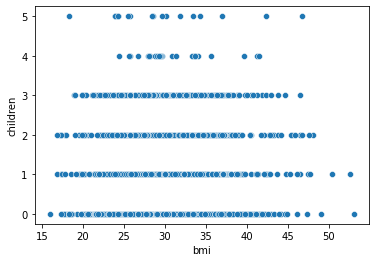

In [44]:
sns.scatterplot(data=df, x='bmi', y='children')

* There is no logical relation between the number of children and body mass index. 

Case 2- Is there any relation between a person's number of children and his/her age?

<AxesSubplot:xlabel='age', ylabel='children'>

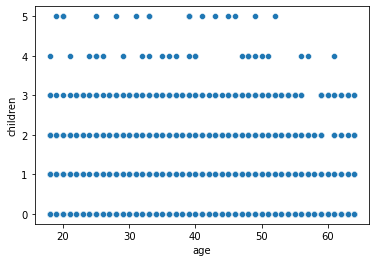

In [45]:
sns.scatterplot(data=df, x='age', y='children')

* Like previous case, there is no logical relation between the number of children and a person's age. 

Case 3- Is there any relation between a person's number of children and his/her insurance charges?

<AxesSubplot:xlabel='charges', ylabel='children'>

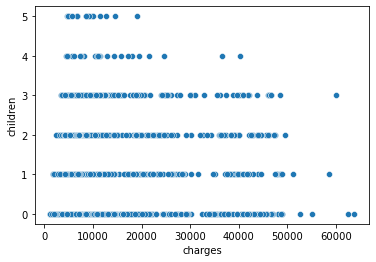

In [50]:
sns.scatterplot(data=df, x='charges', y='children')

* Here also there is no relation between the number of children and a person's insurance charges. 

Case 4- Is there any relation between a person's bmi and his/her age?

In [86]:
corr_mat = np.corrcoef(df['age'], df['bmi'])
r = corr_mat[0][1]
b = r * (np.std(df['bmi']) / np.std(df['age']))
a = np.mean(df['bmi']) - b * np.mean(df['age'])
x = np.linspace(17, 65)
y = a + b * x

Text(0.5, 1.0, 'Least Square Regression')

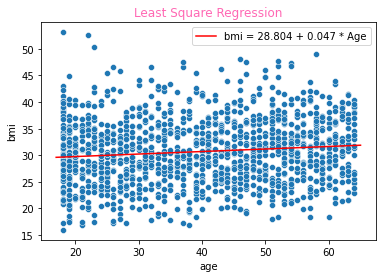

In [87]:
sns.scatterplot(data=df, x='age', y='bmi')
plt.plot(x, y, '-r', label=f'bmi = {round(a,3)} + {round(b,3)} * Age')
plt.legend()
plt.title('Least Square Regression', color='#FF69B4')

* The relastion is positive, not even close to linear, and very weak. 
* It doesn't look like to be a good relationship between the age and bmi. People in diffrent ages have variety of bmi, from very low to very high. 
* We can see the outliers on the top part.

Case 5- Is there any relation between a person's bmi and his/her insurance charges?

In [90]:
corr_mat = np.corrcoef(df['charges'], df['bmi'])
r = corr_mat[0][1]
b = r * (np.std(df['charges']) / np.std(df['bmi']))
a = np.mean(df['charges']) - b * np.mean(df['bmi'])
x = np.linspace(15, 54)
y = a + b * x

Text(0.5, 1.0, 'Least Square Regression')

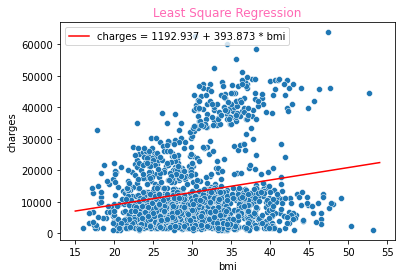

In [91]:
sns.scatterplot(data=df, y='charges', x='bmi')
plt.plot(x, y, '-r', label=f'charges = {round(a,3)} + {round(b,3)} * bmi')
plt.legend()
plt.title('Least Square Regression', color='#FF69B4')

* As it is shown by the scatter plot and the least square regression line, there is positive, non-linear, and weak relation between bmi and charges. 
* Some cases of outliers are depicted in different parts of the plot

Case 6- Is there any relation between a person's age and his/her insurance charges?

In [73]:
corr_mat = np.corrcoef(df['age'], df['charges'])
r = corr_mat[0][1]
b = r * (np.std(df['charges']) / np.std(df['age']))
a = np.mean(df['charges']) - b * np.mean(df['age'])
x = np.linspace(17, 65)
y = a + b * x

Text(0.5, 1.0, 'Least Square Regression')

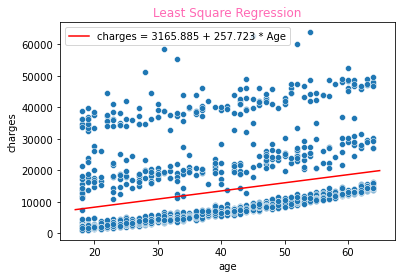

In [85]:
sns.scatterplot(data=df, x='age', y='charges')
plt.plot(x, y, '-r', label=f'charges = {round(a,3)} + {round(b,3)} * Age')
plt.legend()
plt.title('Least Square Regression', color='#FF69B4')

* This scatter plot and LSR line show that there is a positive, linear, but not much strong relation between the two variable, age and charges. 
* However, there seems that this data can be categorized according to this scatter plot, and after categorization, each category could demonstrate a decent relation between the mentioned variables.
* There looks like to be some outliers at the top of the plot. 